In [34]:
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import XGBRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import plot_importance
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor, GradientBoostingClassifier,  GradientBoostingRegressor
from sklearn.datasets import make_classification, make_regression, load_breast_cancer,load_iris,fetch_california_housing, fetch_openml
from sklearn.metrics import accuracy_score,mean_absolute_error, r2_score, f1_score,mean_squared_error, confusion_matrix, roc_curve, auc, classification_report
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss
from xgboost import XGBClassifier

In [2]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.2 MB/s eta 0:00:00


In [ ]:
# Train an AdaBoost Classifier on a sample dataset and print model accuracy.
# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                           n_redundant=5, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the AdaBoost classifier
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)

# Make predictions
y_pred = adaboost.predict(X_test)

# Calculate and print model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 0.82


In [ ]:
# Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE).
# Generate synthetic dataset
X, y = make_regression(n_samples=500, n_features=5, noise=0.2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize AdaBoost Regressor with a Decision Tree as base estimator
base_model = DecisionTreeRegressor(max_depth=4)
adaboost = AdaBoostRegressor(estimator=base_model, n_estimators=50, learning_rate=0.1, random_state=42)  # Updated argument

# Train the model
adaboost.fit(X_train, y_train)

# Make predictions
y_pred = adaboost.predict(X_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 32.87


In [ ]:
# Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance.
# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names  # Get feature names

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = gb_classifier.predict(X_test)

# Compute Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Get and print feature importances
feature_importances = gb_classifier.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)

Accuracy: 0.96

Feature Importance:
                    Feature  Importance
7       mean concave points    0.450528
27     worst concave points    0.240103
20             worst radius    0.075589
22          worst perimeter    0.051408
21            worst texture    0.039886
23               worst area    0.038245
1              mean texture    0.027805
26          worst concavity    0.018725
16          concavity error    0.013068
13               area error    0.008415
10             radius error    0.006870
24         worst smoothness    0.004811
19  fractal dimension error    0.004224
11            texture error    0.003604
5          mean compactness    0.002996
15        compactness error    0.002511
4           mean smoothness    0.002467
17     concave points error    0.002038
28           worst symmetry    0.001478
12          perimeter error    0.001157
6            mean concavity    0.000922
18           symmetry error    0.000703
14         smoothness error    0.000556
8   

In [ ]:
#Train a Gradient Boosting Regressor and evaluate using R-Squared Score.
# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = 3 * X[:, 0] + 2 * X[:, 1] + np.random.randn(100)  # Linear relation with noise

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_regressor.fit(X_train, y_train)

# Predict on test data
y_pred = gb_regressor.predict(X_test)

# Evaluate using R-Squared score
r2 = r2_score(y_test, y_pred)
print(f'R-Squared Score: {r2:.4f}')

R-Squared Score: 0.1143


In [ ]:
# Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting.
# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

# Train Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)

# Compare Accuracies
acc_xgb = accuracy_score(y_test, y_pred_xgb)
acc_gb = accuracy_score(y_test, y_pred_gb)

print(f"XGBoost Accuracy: {acc_xgb:.4f}")
print(f"Gradient Boosting Accuracy: {acc_gb:.4f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:04:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 1.0000
Gradient Boosting Accuracy: 1.0000


In [4]:
# Train a CatBoost Classifier and evaluate using F1-Score.
# Load dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Convert to binary classification (for F1-score clarity)
y = (y == 2).astype(int)  # Making it a binary problem

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoost Classifier
model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, verbose=0)

# Train model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate using F1-score
f1 = f1_score(y_test, y_pred)

print(f"F1-Score: {f1:.4f}")

F1-Score: 1.0000


In [8]:
# Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE).
# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost Regressor
xgb_reg = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_reg.fit(X_train, y_train)

# Make predictions
y_pred = xgb_reg.predict(X_test)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.2952


Model Accuracy: 0.93


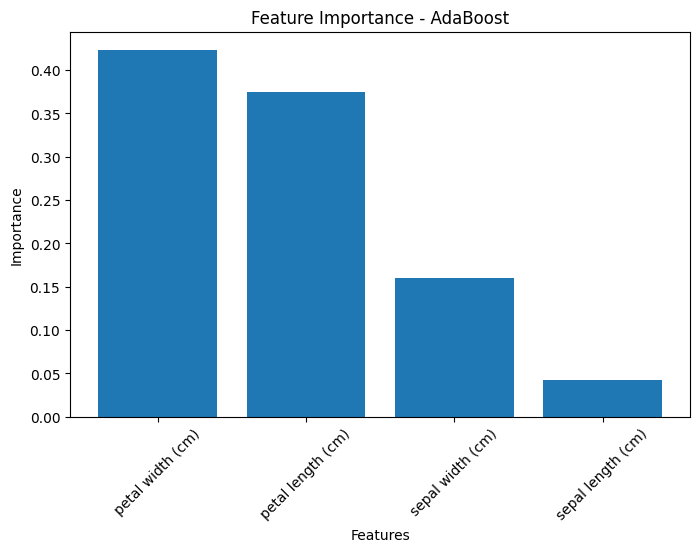

In [13]:
#Train an AdaBoost Classifier and visualize feature importance.
# Load dataset
data = load_iris()
X, y = data.data, data.target
feature_names = data.feature_names

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost Classifier with DecisionTree as base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)  # Weak learner
model = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)  # Use 'estimator' instead of 'base_estimator'
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Plot feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
plt.title("Feature Importance - AdaBoost")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

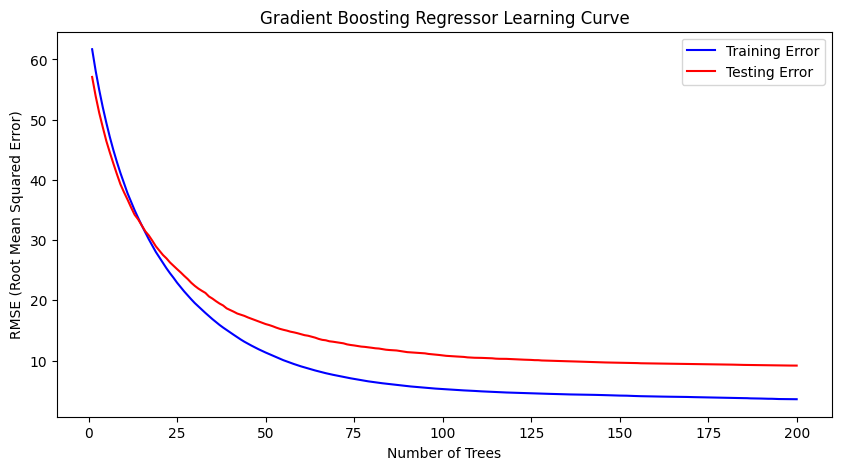

In [14]:
# Train a Gradient Boosting Regressor and plot learning curves.
# Generate synthetic dataset
X, y = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb_regressor.fit(X_train, y_train)

# Compute learning curves
train_errors = []
test_errors = []
for i, y_pred_train in enumerate(gb_regressor.staged_predict(X_train)):
    train_errors.append(mean_squared_error(y_train, y_pred_train))

for i, y_pred_test in enumerate(gb_regressor.staged_predict(X_test)):
    test_errors.append(mean_squared_error(y_test, y_pred_test))

# Plot learning curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_errors) + 1), np.sqrt(train_errors), label="Training Error", color='blue')
plt.plot(range(1, len(test_errors) + 1), np.sqrt(test_errors), label="Testing Error", color='red')
plt.xlabel("Number of Trees")
plt.ylabel("RMSE (Root Mean Squared Error)")
plt.title("Gradient Boosting Regressor Learning Curve")
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:30:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Accuracy: 0.9550


<Figure size 1000x500 with 0 Axes>

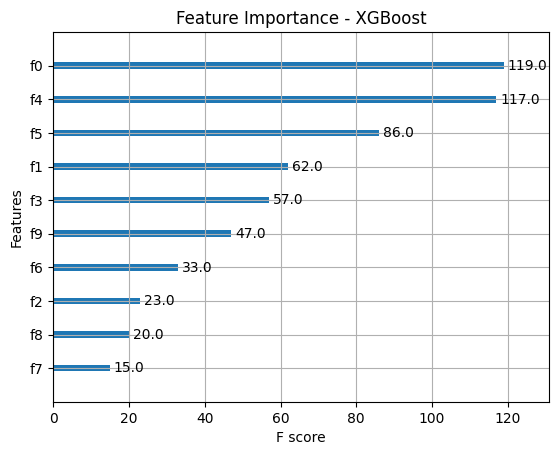

In [16]:
# Train an XGBoost Classifier and visualize feature importance.
# Generate synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(X_train, y_train)

# Predict and evaluate accuracy
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Visualize feature importance
plt.figure(figsize=(10, 5))
plot_importance(xgb_classifier, importance_type="weight", max_num_features=10)  # Options: 'weight', 'gain', 'cover'
plt.title("Feature Importance - XGBoost")
plt.show()

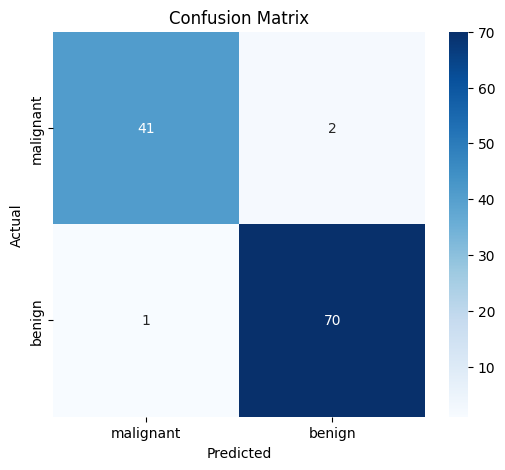

Accuracy: 0.97


In [18]:
# Train a CatBoost Classifier and plot the confusion matrix.
# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train CatBoost Classifier
model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, verbose=0)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

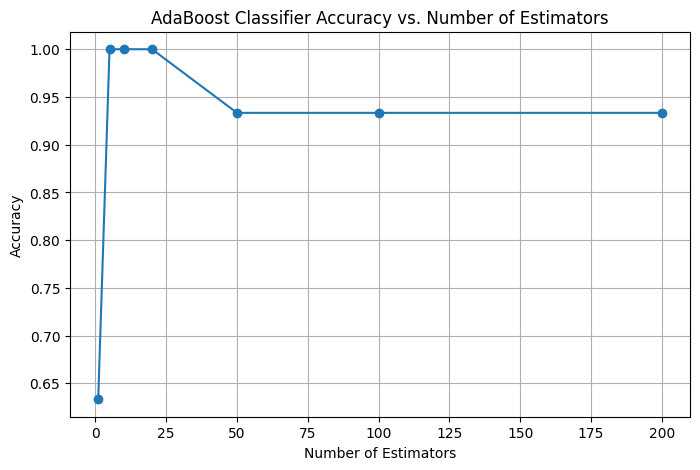

Number of Estimators: 1, Accuracy: 0.63
Number of Estimators: 5, Accuracy: 1.00
Number of Estimators: 10, Accuracy: 1.00
Number of Estimators: 20, Accuracy: 1.00
Number of Estimators: 50, Accuracy: 0.93
Number of Estimators: 100, Accuracy: 0.93
Number of Estimators: 200, Accuracy: 0.93


In [20]:
# Train an AdaBoost Classifier with different numbers of estimators and compare accuracy.
# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Different numbers of estimators to test
n_estimators_list = [1, 5, 10, 20, 50, 100, 200]

# Store accuracy results
accuracy_scores = []

# Train AdaBoost classifier with different n_estimators
for n in n_estimators_list:
    model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, accuracy_scores, marker='o', linestyle='-')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('AdaBoost Classifier Accuracy vs. Number of Estimators')
plt.grid(True)
plt.show()

# Print accuracy scores
for n, acc in zip(n_estimators_list, accuracy_scores):
    print(f'Number of Estimators: {n}, Accuracy: {acc:.2f}')

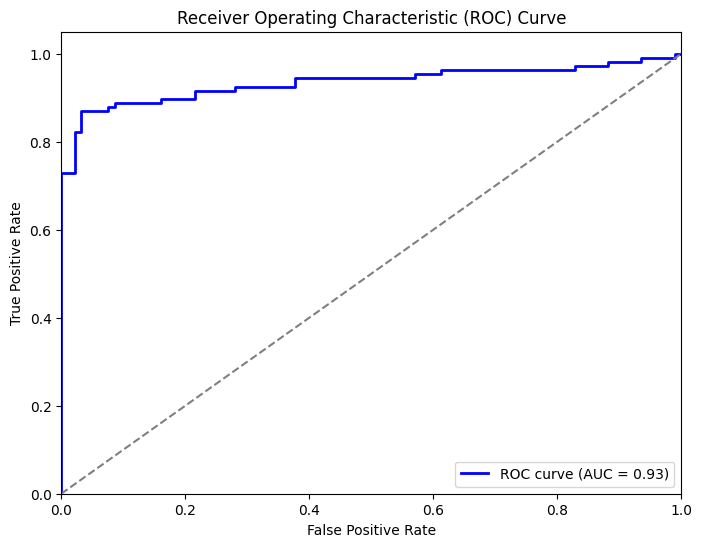

In [22]:
# Train a Gradient Boosting Classifier and visualize the ROC curve.
# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)

# Predict probabilities
y_scores = gb_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [26]:
# Train an XGBoost Regressor and tune the learning rate using GridSearchCV.
# Sample dataset (Replace with actual data)
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X, y = data.data, data.target

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost Regressor
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define parameter grid for tuning learning rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and corresponding score
print("Best Learning Rate:", grid_search.best_params_['learning_rate'])
print("Best Score (Negative MSE):", grid_search.best_score_)

# Train the final model with best learning rate
best_xgb = XGBRegressor(objective='reg:squarederror', learning_rate=grid_search.best_params_['learning_rate'], random_state=42)
best_xgb.fit(X_train, y_train)

# Evaluate on test data
y_pred = best_xgb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)

Best Learning Rate: 0.2
Best Score (Negative MSE): -0.22140365953916255
Test MSE: 0.21596203014190907


In [31]:
# Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting.
# Generate an imbalanced dataset
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2,
                           weights=[0.9, 0.1], random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize CatBoost Classifier without class weights
model_no_weight = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0, random_seed=42)

# Train the model
model_no_weight.fit(X_train, y_train)

# Predict and evaluate
y_pred_no_weight = model_no_weight.predict(X_test)
print("Performance without class weighting:")
print(classification_report(y_test, y_pred_no_weight))

# Compute class weights
class_weights = {0: 1, 1: sum(y == 0) / sum(y == 1)}  # Inverse class frequency

# Initialize CatBoost Classifier with class weights
model_weighted = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0, random_seed=42,
                                    class_weights=class_weights)

# Train the weighted model
model_weighted.fit(X_train, y_train)

# Predict and evaluate
y_pred_weighted = model_weighted.predict(X_test)
print("Performance with class weighting:")
print(classification_report(y_test, y_pred_weighted))

Performance without class weighting:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1794
           1       0.79      0.70      0.74       206

    accuracy                           0.95      2000
   macro avg       0.88      0.84      0.86      2000
weighted avg       0.95      0.95      0.95      2000

Performance with class weighting:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1794
           1       0.70      0.85      0.77       206

    accuracy                           0.95      2000
   macro avg       0.84      0.90      0.87      2000
weighted avg       0.95      0.95      0.95      2000



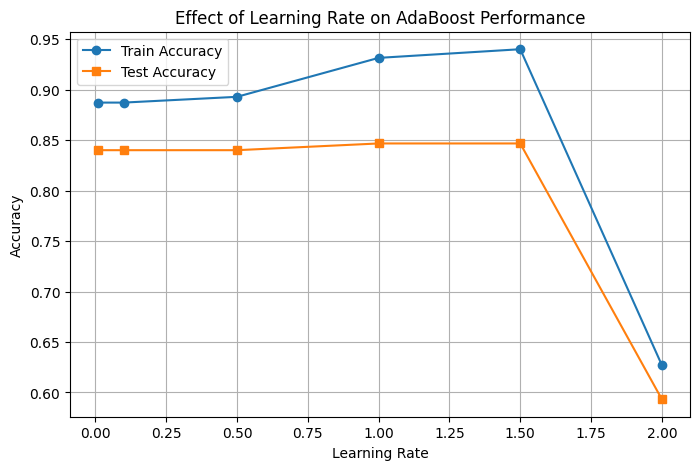

In [33]:
#Train an AdaBoost Classifier and analyze the effect of different learning rates.
# Generate synthetic dataset

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define different learning rates to test
learning_rates = [0.01, 0.1, 0.5, 1.0, 1.5, 2.0]
train_accuracies = []
test_accuracies = []

# Train AdaBoost classifiers with different learning rates
for lr in learning_rates:
    model = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),  # Weak learner
        n_estimators=50,
        learning_rate=lr,
        random_state=42
    )
    model.fit(X_train, y_train)

    # Evaluate performance
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(learning_rates, train_accuracies, label="Train Accuracy", marker='o')
plt.plot(learning_rates, test_accuracies, label="Test Accuracy", marker='s')
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.title("Effect of Learning Rate on AdaBoost Performance")
plt.legend()
plt.grid(True)
plt.show()

In [35]:
#  Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.
# Load dataset
data = load_iris()
X = data.data
y = data.target

# Encode labels (if necessary)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Classifier
model = XGBClassifier(objective='multi:softprob', num_class=3, eval_metric='mlogloss', use_label_encoder=False)
model.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = model.predict_proba(X_test)

# Compute Log Loss
loss = log_loss(y_test, y_pred_proba)
print(f'Log Loss: {loss:.4f}')

Log Loss: 0.0093


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:06:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
